In [16]:
import seabreeze.spectrometers as sb
import matplotlib.pyplot as plt

In [17]:
spec = sb.Spectrometer.from_first_available()

SeaBreezeError: No unopened device found.

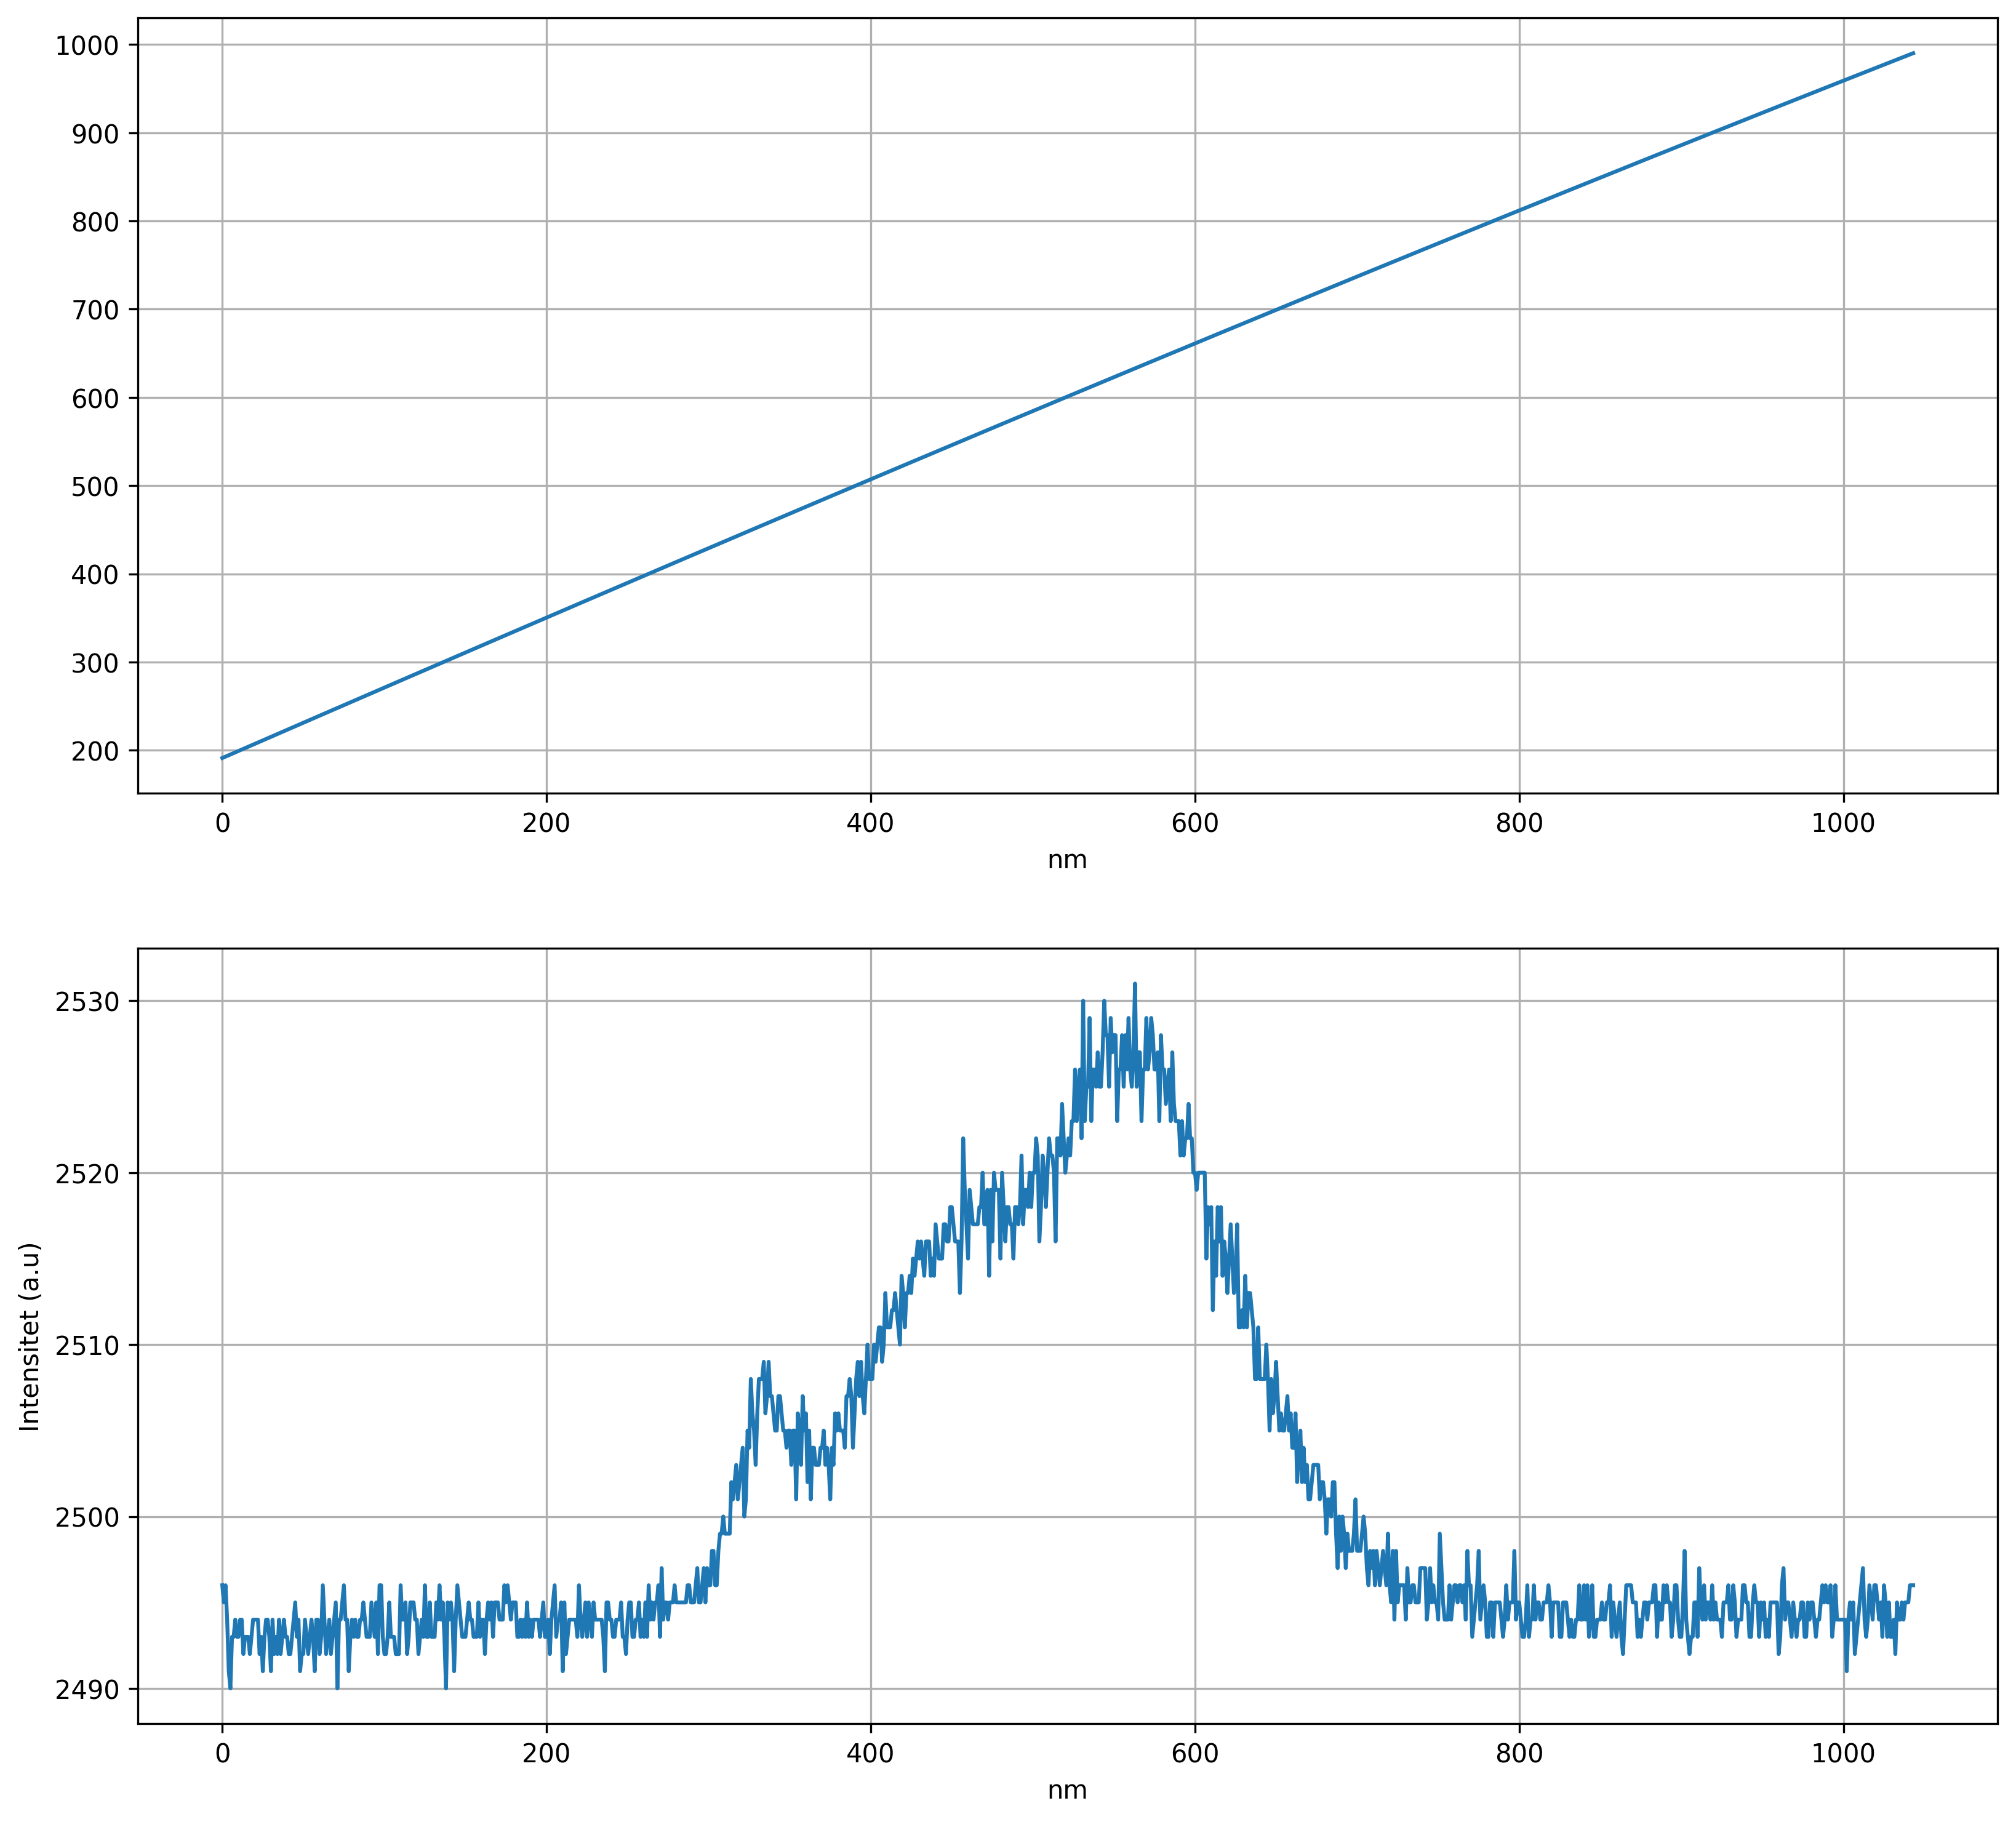

In [18]:
spec.integration_time_micros(20000)
bølgelængder = spec.wavelengths()
intensiteter = spec.intensities()

plt.figure(figsize=(13, 12), dpi=300)

plt.subplot(2, 1, 1)
plt.xlabel("nm")
plt.grid()
plt.plot(bølgelængder)

plt.subplot(2, 1, 2)
plt.xlabel("nm")
plt.grid()
# plt.fill_betweenx(range(10), 400, 800)
plt.ylabel("Intensitet (a.u)")
plt.plot(intensiteter)

plt.show()

In [32]:
spec.temperature_get_all()

AttributeError: 'Spectrometer' object has no attribute 'temperature_get_all'

In [ ]:
# Check what features your device supports
print(spec.features)

# TEC temperature (QE65000 has a TEC)
print(spec.f.tec.read_temperature_degrees_celsius())

# Or if that doesn't work:
print(spec.f.temperature.temperature_get_all())

In [ ]:
# Device info
print(spec.model)          # "QE65000"
print(spec.serial_number)  # "QEB0413"

# Integration time limits
print(spec.integration_time_micros_limits)  # (min, max) in microseconds

# Maximum intensity (ADC ceiling, useful for saturation check)
print(spec.max_intensity)  # QE65000 is 16-bit -> 65535

# Dark pixel indices (optically masked pixels for dark correction)
print(spec.f.spectrometer.get_electric_dark_pixel_indices())

# Intensities with built-in corrections
intensities = spec.intensities(
    correct_dark_counts=True,     # subtracts dark pixel average
    correct_nonlinearity=True     # applies factory nonlinearity correction
)

# TEC control (QE65000 specific - cooled detector)
spec.f.tec.set_temperature_setpoint_degrees_celsius(-10)  # set target temp
spec.f.tec.enable_tec(True)                               # turn on cooling
temp = spec.f.tec.read_temperature_degrees_celsius()      # read current temp